In [1]:
import rasterio
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot
from lib import tools

In [2]:
# freeze
# Vectorized comparison functions for mapping categorical values
def isinrange(vals, lower, upper):
    return np.logical_and(vals>=lower, vals<=upper).astype(np.uint8)

def isinset(vals, targetset):
    accum = np.zeros_like(vals)
    for t in targetset:
        accum = np.logical_or( accum, vals==t )
    return accum.astype(np.uint8)

In [3]:
# freeze
def dotranslate(infile,outfile):
    with rasterio.Env(sparse_ok=True):
        with rasterio.open(infile) as inp:
            outprofile = inp.profile
            outprofile['count'] = 9
            outprofile['sparse_ok'] = True
            with rasterio.open(outfile,'w',**outprofile) as outp:
                outp.descriptions = ['mask','water','barren','grass','shrub','wetlands','forest','farm','urban']
                for _,window in tqdm(inp.block_windows(1)):
                    vals = inp.read(1,window=window)
                    outp.write(255*(vals<=44).astype(np.uint8),1,window=window) # mask
                    outp.write(255*isinrange(vals,40,44),2,window=window) # water
                    outp.write(255*isinset(vals,[7,8,9,11,30,31,32,33,34]),3,window=window) # barren
                    outp.write(255*isinset(vals,[10,11,18,21,26]),4,window=window) # grass
                    outp.write(255*isinrange(vals,27,29),5,window=window) # shrub
                    outp.write(255*isinset(vals,[14,35,36,37,38,39]),6,window=window) # wetlands
                    outp.write(255*isinset(vals,[10,16,17,21,22,23,24,25,29]),7,window=window) # forest
                    outp.write(255*isinrange(vals,12,21),8,window=window) # farm
                    outp.write(255*isinrange(vals,1,11),9,window=window) # urban


In [5]:
#freeze
dotranslate('start_cropped_lzw.tif','processed.tif')

29574it [01:56, 351.87it/s]


The result is about 150M, an improvement over our previous efforts...

In [16]:
orig = rasterio.open('corine/corine.tif')

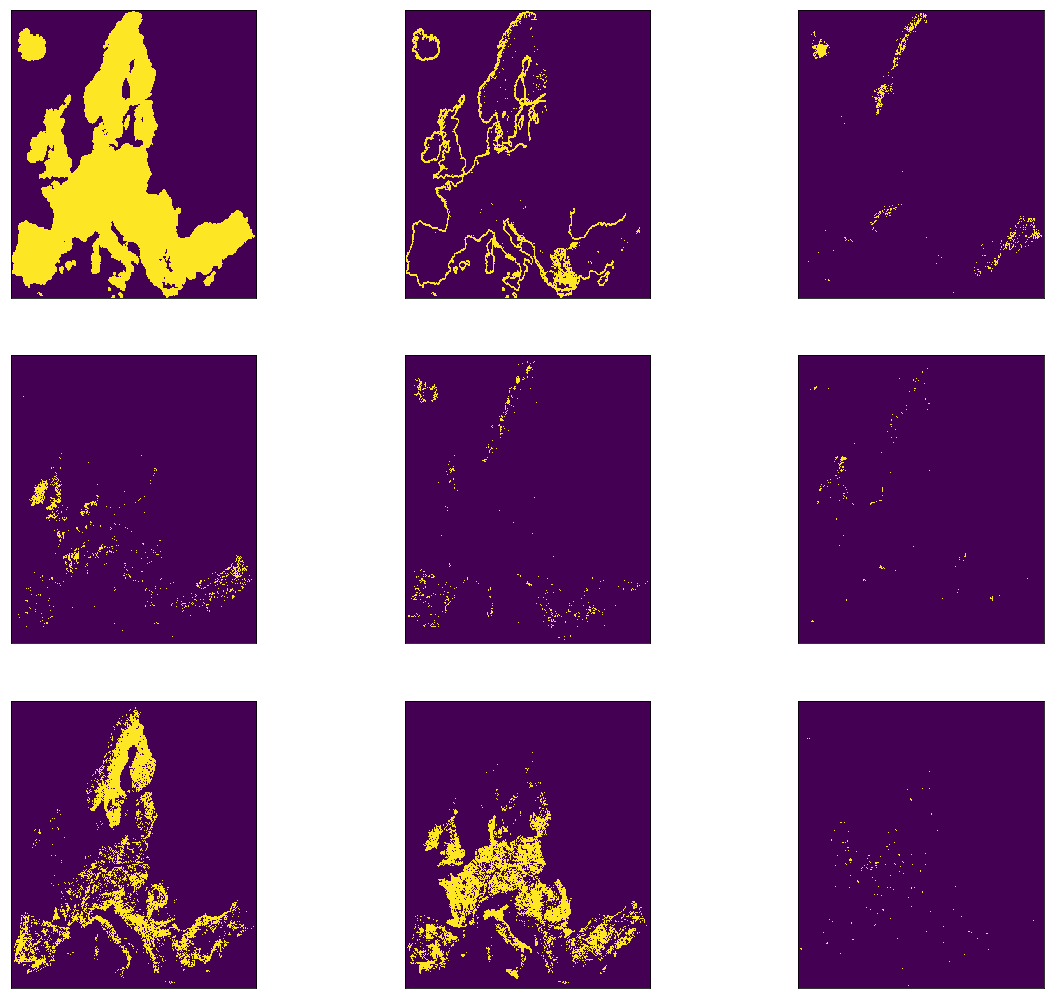

In [22]:
tools.showbands(orig)

In [31]:
orig.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 47500,
 'height': 40500,
 'count': 9,
 'crs': CRS({'init': 'epsg:3035'}),
 'transform': Affine(100.0, 0.0, 2600000.0,
        0.0, -100.0, 5450000.0)}

In [7]:
c29 = rasterio.open('corine_32729.tif')

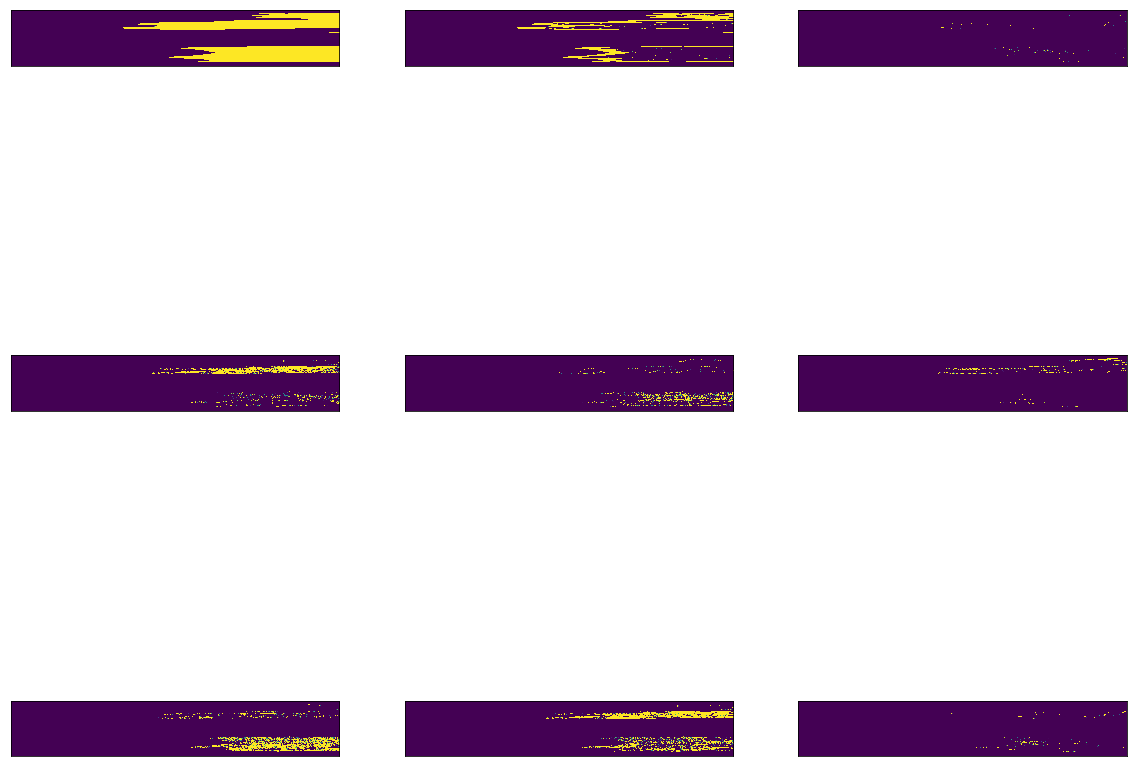

In [8]:
tools.showbands(c29)

In [9]:
dat = c29.read(1)

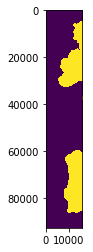

In [11]:
pyplot.imshow(dat)

In [12]:
c29 = rasterio.open('corine_32630.tif')

In [13]:
dat = c29.read(1)

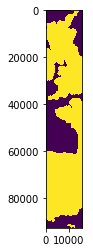

In [14]:
pyplot.imshow(dat)

In [20]:
c29 = rasterio.open('corine_32631.tif')

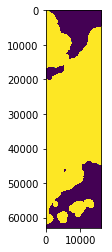

In [21]:
pyplot.imshow(c29.read(1))

In [18]:
c29 = rasterio.open('corine_32632.tif')

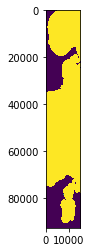

In [19]:
pyplot.imshow(c29.read(1))

In [26]:
c29 = rasterio.open('corine_32633.tif')

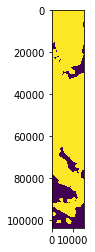

In [27]:
pyplot.imshow(c29.read(1))

In [28]:
c29 = rasterio.open('corine_32634.tif')

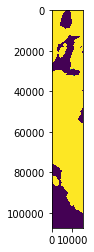

In [29]:
pyplot.imshow(c29.read(1))

In [31]:
from rasterio.windows import Window

In [32]:
dat = c29.read(window=Window(0,40000,1000,1000))

In [33]:
dat.shape

(9, 1000, 1000)

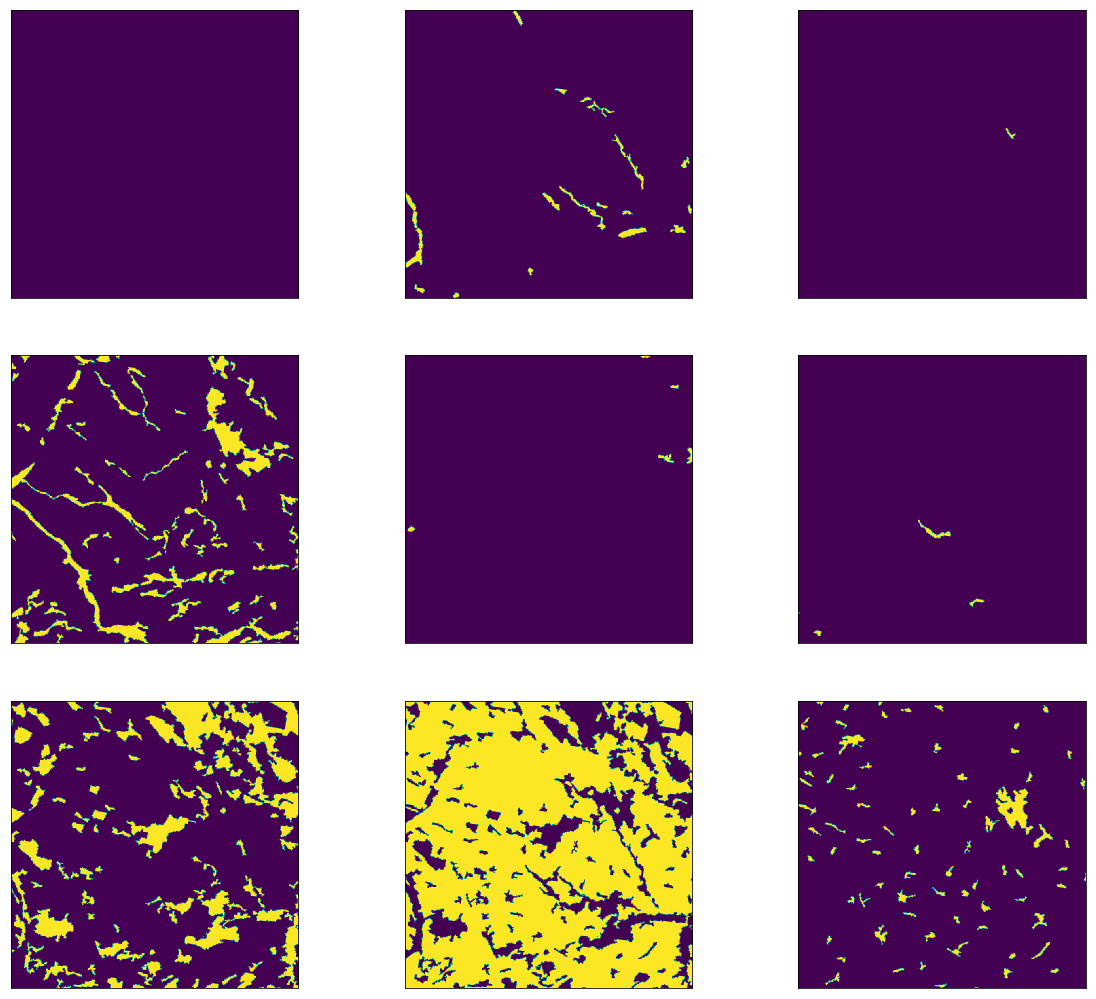

In [38]:
showaxes(dat)

In [39]:
c29 = rasterio.open('corine_32635.tif')

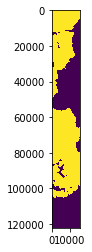

In [40]:
pyplot.imshow(c29.read(1))

In [2]:
c29 = rasterio.open('corine_32636.tif')

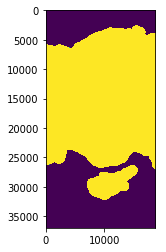

In [3]:
pyplot.imshow(c29.read(1))

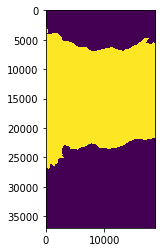

In [4]:
c29 = rasterio.open('corine_32637.tif')
pyplot.imshow(c29.read(1))

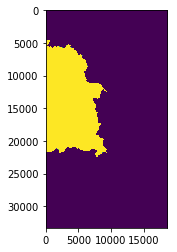

In [5]:
c29 = rasterio.open('corine_32638.tif')
pyplot.imshow(c29.read(1))